In [1]:
import matplotlib.pyplot as plt
import numpy as np

from upsampling.data_reuse import *

In [2]:
height = width = 1024
num_channels = 3
kernel_size = 3

# Using NVIDIA GTX 680 from Choi et al. (2013) - A Roofline Model of Energy
e_flop = 43.2  * 1e-12 # J / flop
e_mem = 437.5 * 1e-12 # J / byte
pi_0 = 66.37 # watts

t_flop = 1. / (1e9 * 3532.8) # s / flop
t_mem = 1. / (1e9 * 192.2) # s / byte

num_bytes = 4 # 32-bit = 4 bytes
alpha = 0.99 # data reuse coefficient

# Time and Energy Costs

### Deconvolution Algorithms: D-SP

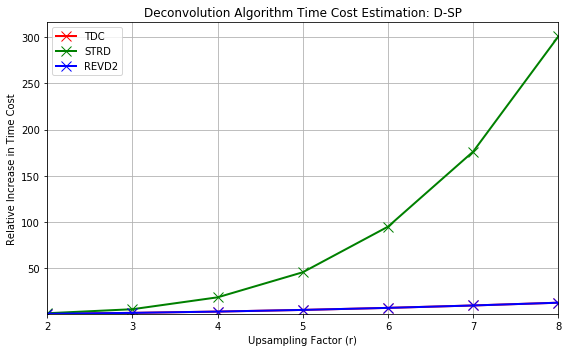

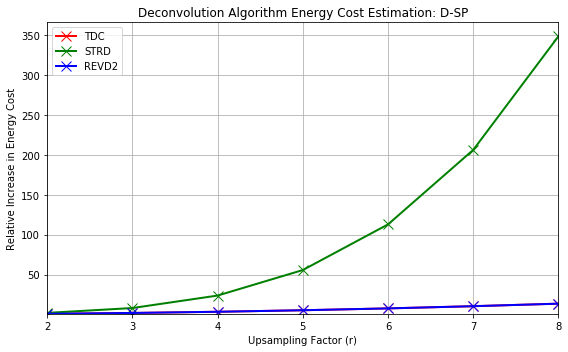

In [3]:
latency_measurements = np.zeros((3, 7)) # microseconds
energy_consumption = np.zeros((3, 7)) # millijoules

for j, upscaling_factor in enumerate(np.arange(2, 9)):
    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    T = max(macs * t_flop, num_bytes * (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, j] = 1e6 * T # microseconds
    energy_consumption[0, j] = 1e3 * E # millijoules
    
    macs, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    T = max(macs * t_flop, num_bytes * (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, j] = 1e6 * T # microseconds
    energy_consumption[1, j] = 1e3 * E # millijoules

    macs, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    T = max(macs * t_flop, num_bytes * (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, j] = 1e6 * T # microseconds
    energy_consumption[2, j] = 1e3 * E # millijoules

x  = np.arange(2, 9)
Tb = latency_measurements[0,0]
Eb = energy_consumption[0,0]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[2] / Tb, label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[1] / Tb, label="STRD", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[0] / Tb, label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.xlim(2,8)
plt.ylim(1,)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Relative Increase in Time Cost")
plt.title("Deconvolution Algorithm Time Cost Estimation: D-SP")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-time-consumption-D-SP-NVIDIA-GTX-680.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[2] / Eb, label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[1] / Eb, label="STRD", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[0] / Eb, label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.ylim(1,)
plt.xlim(2,8)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Relative Increase in Energy Cost")
plt.title("Deconvolution Algorithm Energy Cost Estimation: D-SP")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-energy-consumption-D-SP-NVIDIA-GTX-680.png")
plt.show()

### Deconvolution Algorithms: D-NN

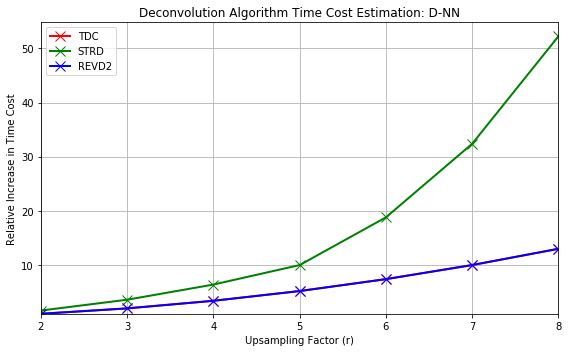

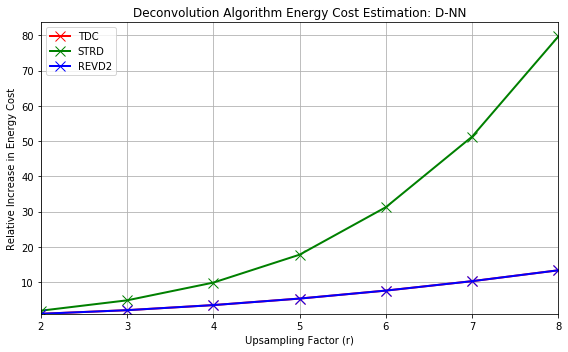

In [4]:
latency_measurements = np.zeros((3, 7)) # microseconds
energy_consumption = np.zeros((3, 7)) # millijoules

for j, upscaling_factor in enumerate(np.arange(2, 9)):
    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, num_bytes * (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, j] = 1e6 * T # microseconds
    energy_consumption[0, j] = 1e3 * E # millijoules
    
    macs, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, num_bytes * (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, j] = 1e6 * T # microseconds
    energy_consumption[1, j] = 1e3 * E # millijoules

    macs, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, num_bytes * (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, j] = 1e6 * T # microseconds
    energy_consumption[2, j] = 1e3 * E # millijoules

x  = np.arange(2, 9)
Tb = latency_measurements[0,0]
Eb = energy_consumption[0,0]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[2] / Tb, label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[1] / Tb, label="STRD", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[0] / Tb, label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.ylim(1,)
plt.xlim(2,8)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Relative Increase in Time Cost")
plt.title("Deconvolution Algorithm Time Cost Estimation: D-NN")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-time-consumption-D-NN-NVIDIA-GTX-680.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[2] / Eb, label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[1] / Eb, label="STRD", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[0] / Eb, label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.xlim(2,8)
plt.ylim(1,)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Relative Increase in Energy Cost")
plt.title("Deconvolution Algorithm Energy Cost Estimation: D-NN")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-energy-consumption-D-NN-NVIDIA-GTX-680.png")
plt.show()

### Convolution-based Upsampling Operators

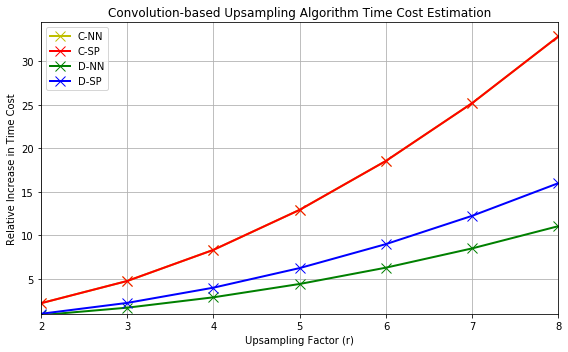

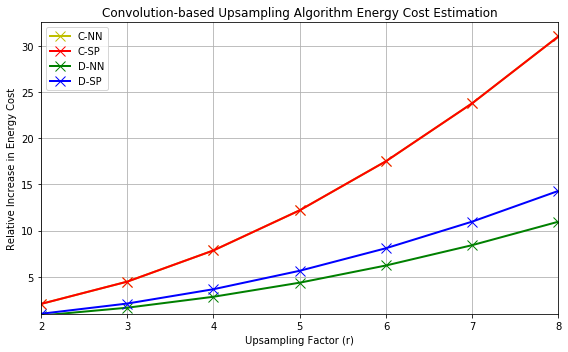

In [5]:
latency_measurements = np.zeros((4, 7)) # microseconds
energy_consumption = np.zeros((4, 7)) # millijoules

for j, upscaling_factor in enumerate(np.arange(2, 9)):
    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, j] = 1e6 * T # microseconds
    energy_consumption[0, j] = 1e3 * E # millijoules

    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, j] = 1e6 * T # microseconds
    energy_consumption[1, j] = 1e3 * E # millijoules
    
    macs, weights, activations = sub_pixel_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, j] = 1e6 * T # microseconds
    energy_consumption[2, j] = 1e3 * E # millijoules

    macs, weights, activations = NN_resize_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[3, j] = 1e6 * T # microseconds
    energy_consumption[3, j] = 1e3 * E # millijoules

x  = np.arange(2, 9)
Tb = latency_measurements[0,0]
Eb = energy_consumption[0,0]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[3] / Tb, label="C-NN", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[2] / Tb, label="C-SP", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[1] / Tb, label="D-NN", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, latency_measurements[0] / Tb, label="D-SP", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.xlim(2, 8)
plt.ylim(1,)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Relative Increase in Time Cost")
plt.title("Convolution-based Upsampling Algorithm Time Cost Estimation")
plt.tight_layout()
plt.savefig("../figures/data_reuse/conv-upsample-ops-time-consumption-NVIDIA-GTX-680.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[3] / Eb, label="C-NN", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[2] / Eb, label="C-SP", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[1] / Eb, label="D-NN", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_consumption[0] / Eb, label="D-SP", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.xlim(2, 8)
plt.ylim(1,)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Relative Increase in Energy Cost")
plt.title("Convolution-based Upsampling Algorithm Energy Cost Estimation")
plt.tight_layout()
plt.savefig("../figures/data_reuse/conv-upsample-ops-energy-consumption-NVIDIA-GTX-680.png")
plt.show()

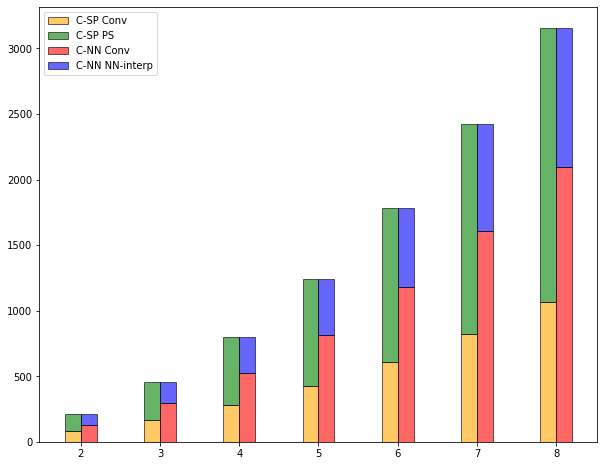

In [6]:
latency_measurements = np.zeros((4, 7)) # microseconds
latency_measurements_data_processing = np.zeros((4, 7)) # microseconds
energy_consumption = np.zeros((4, 7)) # millijoules
energy_consumption_data_processing = np.zeros((4, 7)) # millijoules

for j, upscaling_factor in enumerate(np.arange(2, 9)):
    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, j] = 1e6 * T # microseconds
    energy_consumption[0, j] = 1e3 * E # millijoules

    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, j] = 1e6 * T # microseconds
    energy_consumption[1, j] = 1e3 * E # millijoules
    
    macs, weights, activations, processing = sub_pixel_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        return_total=False
    )
    assert ((weights + activations + processing) * t_mem) > (macs * t_flop)
    T = max(macs * t_flop, (weights + activations + processing) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations + processing) * e_mem + pi_0 * T
    latency_measurements[2, j] = 1e6 * T # microseconds
    energy_consumption[2, j] = 1e3 * E # millijoules
    latency_measurements_data_processing[2, j] = 1e6 * processing * t_mem
    energy_consumption_data_processing[2, j] = 1e3 * processing * e_mem

    macs, weights, activations, processing = NN_resize_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        return_total=False
    )
    assert ((weights + activations + processing) * t_mem) > (macs * t_flop)
    T = max(macs * t_flop, (weights + activations + processing) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations + processing) * e_mem + pi_0 * T
    latency_measurements[3, j] = 1e6 * T # microseconds
    energy_consumption[3, j] = 1e3 * E # millijoules
    latency_measurements_data_processing[3, j] = 1e6 * processing * t_mem
    energy_consumption_data_processing[3, j] = 1e3 * processing * e_mem


x = np.arange(2, 9)
width = 0.2

latency_measurements -= latency_measurements_data_processing

plt.figure(figsize=(10,8))
plt.bar(x - width/2, latency_measurements[2], width, edgecolor='k', alpha=0.6, color='orange', label="C-SP Conv")
plt.bar(x - width/2, latency_measurements_data_processing[2], width, edgecolor='k', alpha=0.6, color='green', label="C-SP PS", bottom=latency_measurements[2])
plt.bar(x + width/2, latency_measurements[3], width, edgecolor='k', alpha=0.6, color='red', label="C-NN Conv")
plt.bar(x + width/2, latency_measurements_data_processing[3], width, edgecolor='k', alpha=0.6, color='blue', label="C-NN NN-interp", bottom=latency_measurements[3])

plt.legend(loc="best")
plt.show()

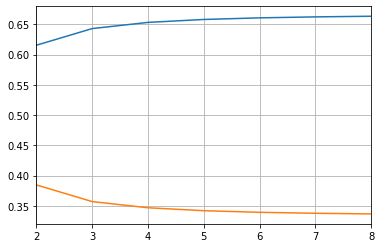

In [14]:
activations_arr = np.zeros((2, 7)) # millijoules
processing_arr = np.zeros((2, 7)) # millijoules

for j, upscaling_factor in enumerate(np.arange(2, 9)):
    
    macs, weights, activations, processing = sub_pixel_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        return_total=False
    )
    activations_arr[0, j] = activations
    processing_arr[0, j] = processing

    macs, weights, activations, processing = NN_resize_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        return_total=False
    )
    activations_arr[1, j] = activations
    processing_arr[1, j] = processing


x = np.arange(2, 9)

plt.figure()
plt.plot(x, processing_arr[0] / (processing_arr[0] + activations_arr[0]))
plt.plot(x, processing_arr[1] / (processing_arr[1] + activations_arr[1]))
plt.xlim(2, 8)
plt.grid()
plt.show()

# Energy Per Pixel (EPP)

In [ ]:
op = "D-SP"

energy_per_pixel = np.zeros((3, 7)) # millijoules
for j, upscaling_factor in enumerate(np.arange(2, 9)):
    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator=op
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    energy_per_pixel[0, j] = 1e6 * E / pow(upscaling_factor * height, 2)# microjoules

    macs, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator=op
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    energy_per_pixel[1, j] = 1e6 * E / pow(upscaling_factor * height, 2)# microjoules

    macs, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator=op
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    energy_per_pixel[2, j] = 1e6 * E / pow(upscaling_factor * height, 2)# microjoules

Eb = energy_per_pixel[0,0]

plt.figure()
# plt.plot(x, energy_consumption[3, 1:] / Eb, label="C-NN", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_per_pixel[2], label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_per_pixel[1], label="STRD", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_per_pixel[0], label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.xlim(2, 8)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Energy per Pixel ($\mu J$ / pixel)")
plt.title(f"Deconvolution Algorithm Energy per Pixel: {op}")
plt.tight_layout()
plt.savefig(f"../figures/data_reuse/deconv-algos-epp-NVIDIA-GTX-680-{op}.png")
plt.show()

In [ ]:
energy_per_pixel = np.zeros((4, 7)) # millijoules
for j, upscaling_factor in enumerate(np.arange(2, 9)):
    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    energy_per_pixel[0, j] = 1e6 * E / pow(upscaling_factor * height, 2)# microjoules

    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    energy_per_pixel[1, j] = 1e6 * E / pow(upscaling_factor * height, 2)# microjoules
    
    macs, weights, activations = sub_pixel_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    energy_per_pixel[2, j] = 1e6 * E / pow(upscaling_factor * height, 2)# microjoules

    macs, weights, activations = NN_resize_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + num_bytes * (weights + activations) * e_mem + pi_0 * T
    energy_per_pixel[3, j] = 1e6 * E / pow(upscaling_factor * height, 2)# microjoules

Eb = energy_per_pixel[0,0]

plt.figure()
# plt.plot(x, energy_consumption[3, 1:] / Eb, label="C-NN", color="y", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_per_pixel[2], label="C-SP & C-NN", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_per_pixel[1], label="D-NN", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, energy_per_pixel[0], label="D-SP", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
# plt.yscale("log")
plt.xlim(2, 8)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Energy per Pixel ($\mu J$ / pixel)")
plt.title("Convolution-based Upsampling Algorithm Energy per Pixel")
plt.tight_layout()
plt.savefig("../figures/data_reuse/conv-upsample-ops-epp-NVIDIA-GTX-680.png")
plt.show()

# Data Reuse Patterns for Deconvolution Algorithms

### Deconvolution Algorithms: D-SP

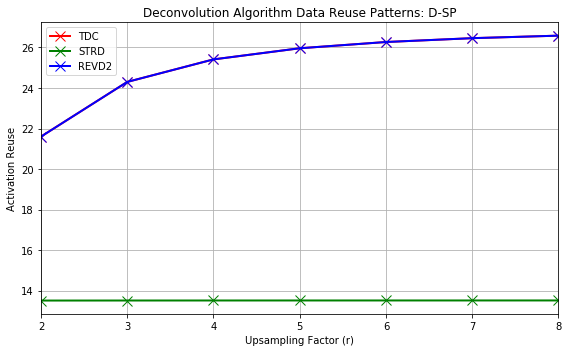

In [7]:
data_reuse = np.zeros((3, 7)) # ops / byte

for j, upscaling_factor in enumerate(np.arange(2, 9)):
    
    macs, _, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    data_reuse[0, j] = macs / activations
    
    _, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    data_reuse[1, j] = macs / activations

    _, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    data_reuse[2, j] = macs / activations
    
x  = np.arange(2, 9)
    
plt.figure(figsize=(8,5))
plt.plot(x, data_reuse[2], label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[1], label="STRD", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[0], label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
# plt.axhline(Be, linestyle="--", color="k")
# plt.axhline(Bt, linestyle="--", color="k")
plt.legend(loc="best")
plt.xlim(2, 8)
plt.grid()
plt.xlabel("Upsampling Factor (r)")
plt.ylabel(r"Activation Reuse")
plt.title("Deconvolution Algorithm Data Reuse Patterns: D-SP")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-data_reuse-D-SP.png")
plt.show()

### Deconvolution Algorithms: D-NN

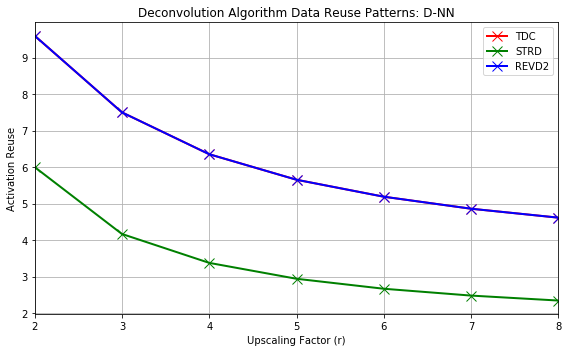

In [8]:
data_reuse = np.zeros((3, 7)) # ops / byte

for j, upscaling_factor in enumerate(np.arange(2, 9)):
    
    macs, _, _ = standard_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    
    _, _, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[0, j] = macs / (activations)
    
    _, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[1, j] = macs / (activations)

    _, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[2, j] = macs / (activations)

x  = np.arange(2, 9)
    
plt.figure(figsize=(8,5))
plt.plot(x, data_reuse[2], label="TDC", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[1], label="STRD", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[0], label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
plt.legend(loc="best")
plt.xlim(2,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel(r"Activation Reuse")
plt.title("Deconvolution Algorithm Data Reuse Patterns: D-NN")
plt.tight_layout()
plt.savefig("../figures/data_reuse/deconv-algos-data_reuse-D-NN.png")
plt.show()


# plt.figure(figsize=(8,5))
# plt.plot(x, data_reuse_ai[2, 1:], label="TDC", color="r", linewidth=2, marker='x', markersize=10)
# plt.plot(x, data_reuse_ai[1, 1:], label="STRD", color="y", linewidth=2, marker='x', markersize=10)
# plt.plot(x, data_reuse_ai[0, 1:], label="REVD2", color="b", linewidth=2, marker='x', markersize=10)
# # plt.axhline(Be, linestyle="--", color="k")
# # plt.axhline(Bt, linestyle="--", color="k")
# plt.legend(loc="best")
# plt.xlim(1,8)
# plt.grid()
# plt.xlabel("Upscaling Factor (r)")
# plt.ylabel(r"Arithmetic Intensity (AI)")
# plt.title("Deconvolution Algorithm Data Reuse Patterns: D-NN")
# plt.tight_layout()
# plt.savefig("../figures/data_reuse/deconv-algos-data_reuse-AI-D-NN.png")
# plt.show()

# Data Reuse Patterns for Convolution-based Upsampling

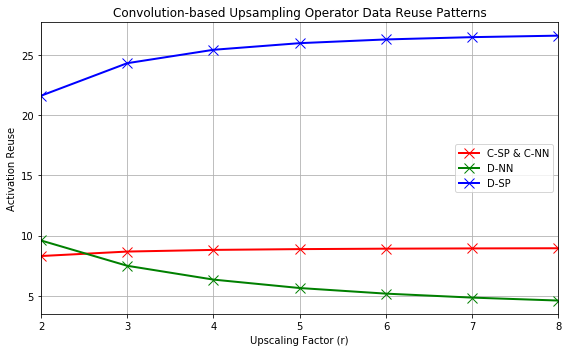

In [9]:
data_reuse = np.zeros((4, 7)) # ops / byte

for j, upscaling_factor in enumerate(np.arange(2, 9)):
    
    macs, weights, activations = sub_pixel_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[2, j] = macs / (activations)

    # can use REVD here rather than REVD2 as there are no extra MACs due to the stride-hole
    # skipping over the kernel space
    macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[1, j] = macs / (activations)
    
    macs, weights, activations = reverse_looping_deconvolution_2_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-SP"
    )
    data_reuse[0, j] = macs / (activations)

x  = np.arange(2, 9)
    
plt.figure(figsize=(8,5))
plt.plot(x, data_reuse[2], label="C-SP & C-NN", color="r", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[1], label="D-NN", color="g", linewidth=2, marker='x', markersize=10)
plt.plot(x, data_reuse[0], label="D-SP", color="b", linewidth=2, marker='x', markersize=10)
# plt.axhline(Be, linestyle="--", color="k")
# plt.axhline(Bt, linestyle="--", color="k")
# plt.text(7, Be + 0.6, r"$B_\epsilon$", size=14)
# plt.text(7, Bt + 0.6, r"$B_\tau$", size=14)
plt.legend(loc="best")
plt.xlim(2,8)
# plt.ylim(0,20)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Activation Reuse")
plt.title("Convolution-based Upsampling Operator Data Reuse Patterns")
plt.tight_layout()
plt.savefig("../figures/data_reuse/conv-upsample-ops-data_reuse.png")
plt.show()

# roofline models of time & energy

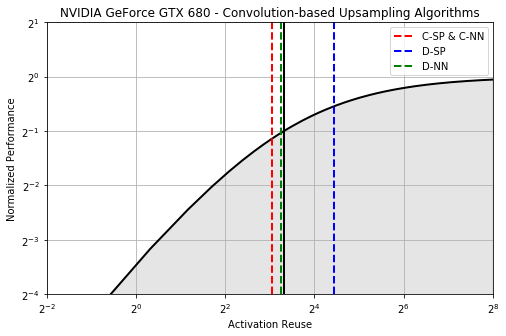

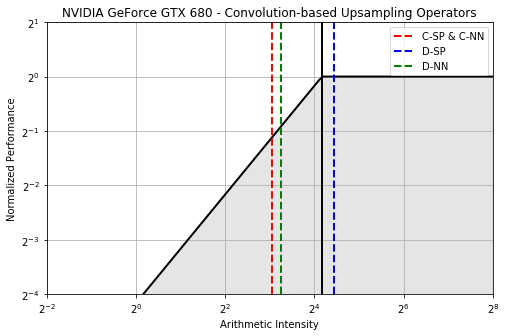

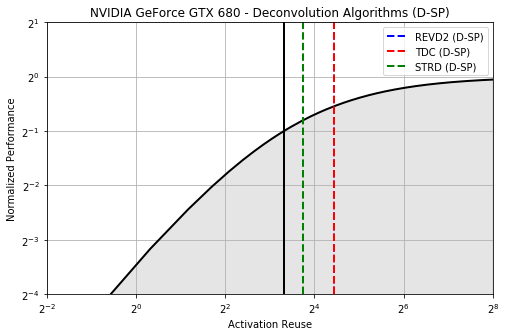

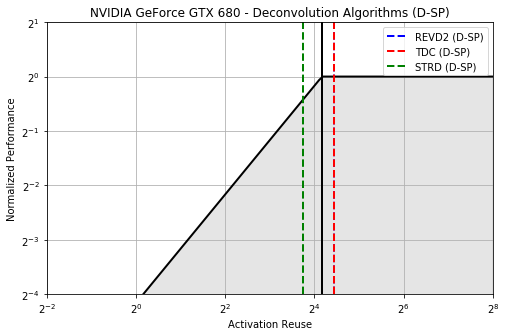

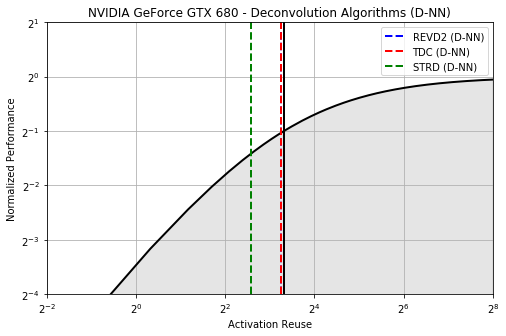

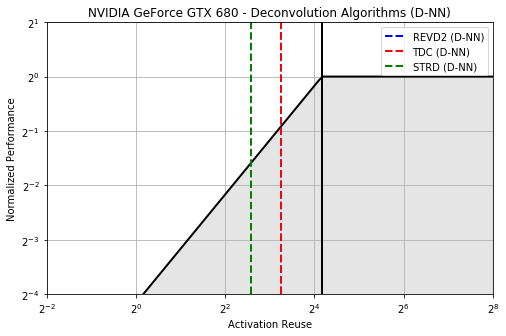

In [10]:
# GPU: NVIDIA GTX 680

r = 2
H = 1024
K = 3
C = 3

Bt = 18 # 32-bit
Be = 10 # 32-bit

I = np.arange(0.25, 256)
T = np.minimum(1, I/Bt) # time throughput model
E = 1 / (1 + (Be / I))

plt.figure(figsize=(8,5))

plt.plot(I, E, linewidth=2, color='k')
plt.fill_between(I, 0, E, color='k', alpha=0.1)
plt.axvline(Be, linewidth=2, color='k')

macs, _, activations = sub_pixel_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="C-SP & C-NN")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="D-SP")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="D-NN")
plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 680 - Convolution-based Upsampling Algorithms")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-roofline-GTX-680-energy.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #


plt.figure(figsize=(8,5))

plt.plot(I, T, linewidth=2, color='k')
plt.fill_between(I, 0, T, color='k', alpha=0.1)

plt.axvline(Bt, linewidth=2, color='k')

macs, weights, activations = sub_pixel_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='r', label="C-SP & C-NN")
macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='b', label="D-SP")
macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='g', label="D-NN")
plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 680 - Convolution-based Upsampling Operators")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"Arithmetic Intensity")
plt.savefig("../figures/data_reuse/conv-upsample-roofline-GTX-680-time.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #

plt.figure(figsize=(8,5))

# plt.plot(I, T, linewidth=2, color='k')
# plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='k')
plt.fill_between(I, 0, E, color='k', alpha=0.1)

# plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='k')

macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="REVD2 (D-SP)")
_, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="TDC (D-SP)")
_, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="STRD (D-SP)")

plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 680 - Deconvolution Algorithms (D-SP)")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-roofline-GTX-680-D-SP-energy.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #

plt.figure(figsize=(8,5))

plt.plot(I, T, linewidth=2, color='k')
plt.fill_between(I, 0, T, color='k', alpha=0.1)

plt.axvline(Bt, linewidth=2, color='k')

macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='b', label="REVD2 (D-SP)")
_, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='r', label="TDC (D-SP)")
_, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='g', label="STRD (D-SP)")

plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 680 - Deconvolution Algorithms (D-SP)")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-roofline-GTX-680-D-SP-time.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #

plt.figure(figsize=(8,5))

# plt.plot(I, T, linewidth=2, color='k')
# plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='k')
plt.fill_between(I, 0, E, color='k', alpha=0.1)

# plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='k')

macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="REVD2 (D-NN)")
_, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="TDC (D-NN)")
_, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="STRD (D-NN)")

plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 680 - Deconvolution Algorithms (D-NN)")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-roofline-GTX-680-D-NN-energy.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #

plt.figure(figsize=(8,5))

plt.plot(I, T, linewidth=2, color='k')
plt.fill_between(I, 0, T, color='k', alpha=0.1)

plt.axvline(Bt, linewidth=2, color='k')

macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='b', label="REVD2 (D-NN)")
_, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='r', label="TDC (D-NN)")
_, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / (weights + activations), linestyle='--', linewidth=2, color='g', label="STRD (D-NN)")

plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 680 - Deconvolution Algorithms (D-NN)")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-roofline-GTX-680-D-NN-time.png")
plt.show()

## Archived Experiments

In [ ]:
# CPU: Intel Core i7-950 (Nehalem)

r = 2
H = 1024
K = 3
C = 3

Bt = 4.2 # 32-bit
Be = 2.1 # 32-bit

I = np.arange(0.25, 256)
T = np.minimum(1, I/Bt) # time throughput model
E = 1 / (1 + (Be / I))

plt.figure(figsize=(8,5))

# plt.plot(I, T, linewidth=2, color='k')
# plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='k')
plt.fill_between(I, 0, E, color='k', alpha=0.1)

# plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='k')

# macs, _, activations = sub_pixel_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
# plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="C-SP")
macs, _, activations = NN_resize_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="C-NN & C-SP")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="D-SP")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="D-NN")

plt.legend(loc='best')

plt.title("Intel i7-950 - Convolution-based Upsampling Operators")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel("Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-i7-950.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #

plt.figure(figsize=(8,5))

# plt.plot(I, T, linewidth=2, color='k')
# plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='k')
plt.fill_between(I, 0, E, color='k', alpha=0.1)

# plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='k')

macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="REVD2 (D-DSP)")
_, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="TDC (D-SP)")
_, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="STRD (D-SP)")

plt.legend(loc='best')

plt.title("Intel Core i7-950 - Deconvolution Algorithms (D-SP)")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel("Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-i7-950-D-SP.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #

plt.figure(figsize=(8,5))

# plt.plot(I, T, linewidth=2, color='k')
# plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='k')
plt.fill_between(I, 0, E, color='k', alpha=0.1)

# plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='k')

macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="REVD2 (D-NN)")
_, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="TDC (D-NN)")
_, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="STRD (D-NN)")

plt.legend(loc='best')

plt.title("Intel Core i7-950 - Deconvolution Algorithms (D-NN)")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel("Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-i7-950-D-NN.png")
plt.show()

In [ ]:
# GPU: NVIDIA GTX 580

Bt = 8.2 # 32-bit
Be = 5.1 # 32-bit

I = np.arange(0.25, 256)
T = np.minimum(1, I/Bt) # time throughput model
E = 1 / (1 + (Be / I))

plt.figure(figsize=(8,5))
# plt.plot(I, T, linewidth=2, color='k')
# plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='k')
plt.fill_between(I, 0, E, color='k', alpha=0.1)

# plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='k')

macs, _, activations = sub_pixel_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="C-SP & C-NN")
# macs, _, activations = NN_resize_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C)
# plt.axvline(macs / activations, linestyle='--', linewidth=2, color='y', label="C-NN")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="D-SP")
macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="D-NN")

plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 580 - Convolution-based Upsampling Operators")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel("Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-GTX-580.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #

plt.figure(figsize=(8,5))

plt.plot(I, T, linewidth=2, color='k')
plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='y')
plt.fill_between(I, 0, E, color='y', alpha=0.1)

plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='y')

macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="REVD2")
_, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="TDC")
_, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-SP")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="STRD")

plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 580 - Deconvolution Algorithms (D-SP)")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-GTX-580-D-SP.png")
plt.show()

# ------------------------------------------------------------------------------------------------------------------ #

plt.figure(figsize=(8,5))

plt.plot(I, T, linewidth=2, color='k')
plt.fill_between(I, 0, T, color='k', alpha=0.1)
plt.plot(I, E, linewidth=2, color='y')
plt.fill_between(I, 0, E, color='y', alpha=0.1)

plt.axvline(Bt, linewidth=2, color='k')
plt.axvline(Be, linewidth=2, color='y')

macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='b', label="REVD2")
_, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='r', label="TDC")
_, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, K=K, C=C, original_operator="D-NN")
plt.axvline(macs / activations, linestyle='--', linewidth=2, color='g', label="STRD")

plt.legend(loc='best')

plt.title("NVIDIA GeForce GTX 580 - Deconvolution Algorithms (D-NN)")
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.grid()
plt.xlim(0.25, 256)
plt.ylim(2**(-4), 2)
plt.ylabel("Normalized Performance")
plt.xlabel(r"Activation Reuse")
plt.savefig("../figures/data_reuse/conv-upsample-ops-roofline-GTX-580-D-NN.png")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
# p = np.zeros(9)
# for r in np.arange(1, 9):
#     _, w_0, _ = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, C=C, K=K, original_operator="D-SP")
#     _, w_r, _ = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, C=C, K=K, original_operator="D-SP")
#     p[r] = 100. * (w_r - w_0) / w_r
# x = np.arange(1, 9)
# plt.plot(x, p[1:], linewidth=2, marker='x', markersize=10, color="b", label="D-SP")
p = np.zeros(7)
for j, r in enumerate(np.arange(2, 9)):
    _, w_0, _ = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, C=C, K=K, original_operator="D-NN")
    _, w_r, _ = transforming_deconvolution_to_convolution_data_reuse_patterns(r=r, H=H, C=C, K=K, original_operator="D-NN")
    p[j] = 100. * (w_r - w_0) / w_r
x = np.arange(2, 9)
plt.plot(x, p, linewidth=2, marker='x', markersize=10, label="D-NN")
# plt.legend(loc="best")
plt.grid()
plt.ylim(0, )
plt.xlim(2, 8)
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Percentage of Zero-Valued Weights (%)")
plt.title("The Impact of Zero-Insertion Requirements for Transforming Deconvolution to Convolution")
plt.tight_layout()
plt.savefig("../figures/data_reuse/TDC-kernel-sparsity.png")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))

for height in [128, 256, 512, 1024, 2048]:
    p = np.zeros(7)
    for j, r in enumerate(np.arange(2, 9)):
        out = (r**2) * (height**2) * C
        _, _, a_0 = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=height, C=C, K=K, original_operator="D-SP")
        _, _, a_r = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=height, C=C, K=K, original_operator="D-SP")
        p[j] = 100. * ((a_r - out) - (a_0 - out)) / (a_r - out)
    x = np.arange(2, 9)
    plt.plot(x, p, linewidth=2, marker='x', markersize=10, label=f"H={height}")
    break

# p = np.zeros(9)
# for r in np.arange(1, 9):
#     out = (r**2) * (H**2) * C
#     _, _, a_0 = reverse_looping_deconvolution_data_reuse_patterns(r=r, H=H, C=C, K=K, original_operator="D-NN")
#     _, _, a_r = fractionally_strided_deconvolution_data_reuse_patterns(r=r, H=H, C=C, K=K, original_operator="D-NN")
#     p[r] = 100. * ((a_r - out) - (a_0 - out)) / (a_r - out)
# x = np.arange(1, 9)
# plt.plot(x, p[1:], linewidth=2, marker='x', markersize=10, color="g", label="D-NN")
# plt.legend(loc="best")
plt.grid()
# plt.ylim(0, )
plt.xlim(2, 8)
plt.xlabel("Upsampling Factor (r)")
plt.ylabel("Percentage of Zero-Valued Input Pixels (%)")
plt.title("The Impact of Zero-Insertion Requirements for Fractionally Strided Deconvolution")
plt.tight_layout()
plt.savefig("../figures/data_reuse/STDR-feature-sparsity.png")
plt.show()